<Container object of 10 artists>

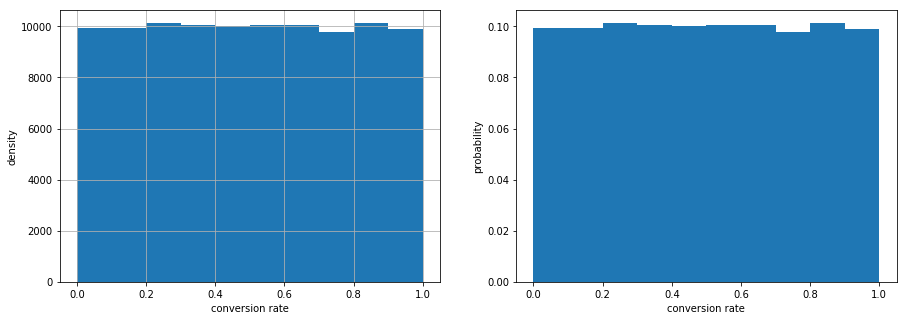

In [173]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

np.random.seed(2018)
# Number of random draws from the prior
n_draw = 100000
ax=plt.subplot(1,2,1)
ax.set(xlabel='conversion rate', ylabel='density')


# Defining and drawing from the prior distribution 
prior_rate = pd.Series(np.random.uniform(0, 1, size = n_draw))


# eyeball the prior to make sure it looks ok.
prior_rate.hist(figsize=(15,5),bins=10 ) 



ax=plt.subplot(1,2,2)
ax.set(xlabel='conversion rate', ylabel='probability')
count, division = np.histogram(prior_rate,bins=10)
prob_prior = list(map(lambda x: float(x)/len(prior_rate),count))
plt.bar(division[:-1],prob_prior, width=(division[-1]-division[-2]), align="edge")


In [156]:
# Defining the generative model
def gen_model(prob,muestra):
   
    return(np.random.binomial(muestra, prob))

#simulator
def simulator_data(muestra,observed_data=None):
    #  the generative model data
    allow_change = list()
    
    # Simulating the data
    for p in prior_rate:
        allow_change.append(gen_model(p, muestra))
    
   
    # Here I filter off all draws that do not match the data.
    post_rate_values = prior_rate[list(map(lambda x: x == observed_data, allow_change))]
    
    return post_rate_values




In [174]:
def visual_hist(posterior):
    
    ax=plt.subplot(1,2,1)
    posterior.hist(figsize=(15,5)) # Eyeball the posterior with frecuency and rate approved
    ax.set(xlabel='conversion rate', ylabel='density')
   
    ax2=plt.subplot(1,2,2)
    count, division = np.histogram(posterior)
    prob_pos = list(map(lambda x: float(x)/len(posterior),count))
    plt.bar(division[:-1], prob_pos, width=(division[-1]-division[-2]), align="edge")# Eyeball the posterior with uncertanly and rate approved
    ax2.set(xlabel='conversion rate', ylabel='probabilty')

In [180]:
# Load the wholesale customers dataset
data = pd.read_csv("segment_data.csv")

#filtering segments 0 from data    
segment_0 = data[data['Segment']==0]
#size of market ($) in segment 0


#filtering segments 1 from data  
segment_1 = data[data['Segment']==1]
#size of market ($) in segment 0


In [181]:
from sklearn.utils import shuffle
# Getting significan samples from each segment.

#Margen: 5%
#Nivel de confianza: 95%
#Poblacion: 258 => rows from segment_0
#Sample: 155
df_sample_s0= (shuffle(segment_0)).head(155)

#Margen: 5%
#Nivel de confianza: 95%
#Poblacion: 177 => rows from segment_1
#Sample: 86
df_sample_s1 = (shuffle(segment_1)).head(86)


Data SEGMENT 0
Number of draws left: 616, 
Posterior mean: 0.382, 
Posterior median: 0.381, 
Posterior 95% quantile interval: 0.310-0.454


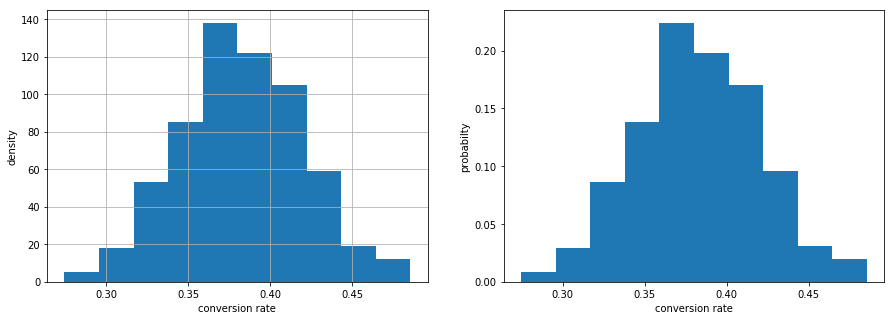

In [182]:
#Simulating data SEGMENT 0

# from marketing we know that 59 customers from  a sample size of 155, accept the change 
#df_sample_s0.shape[0]

post_rate_segment_0 = simulator_data(df_sample_s0.shape[0],59)
visual_hist(post_rate_segment_0)
print "Data SEGMENT 0"
print('Number of draws left: %d, \nPosterior mean: %.3f, \nPosterior median: %.3f, \nPosterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rate_segment_0), post_rate_segment_0.mean(), post_rate_segment_0.median(), post_rate_segment_0.quantile(.025), post_rate_segment_0.quantile(.975)))


Data SEGMENT 1
Number of draws left: 1190, 
Posterior mean: 0.241, 
Posterior median: 0.239, 
Posterior 95% quantile interval: 0.156-0.335


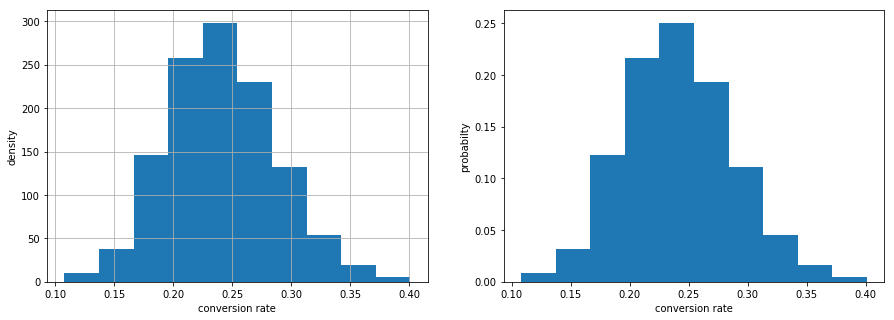

In [183]:
#Simulating data SEGMENT 1
# from marketing we know that 20 customers from  a sample size of 86, accept the change
#df_sample_s1.shape[0]
post_rate_segment_1 = simulator_data(df_sample_s1.shape[0],20)
visual_hist(post_rate_segment_1)
print "Data SEGMENT 1"
print('Number of draws left: %d, \nPosterior mean: %.3f, \nPosterior median: %.3f, \nPosterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rate_segment_1), post_rate_segment_1.mean(), post_rate_segment_1.median(), post_rate_segment_1.quantile(.025), post_rate_segment_1.quantile(.975)))


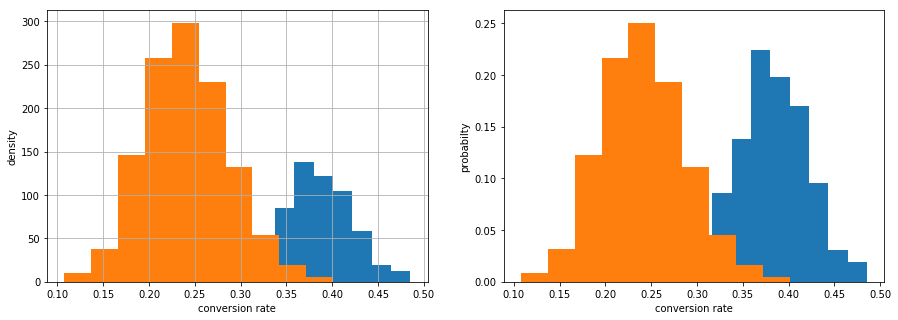

In [184]:
visual_hist(post_rate_segment_0)
visual_hist(post_rate_segment_1)
